<H1>CHAPTER 10 - SIMPLE LINEAR REGRESSION<H1>

<h2>By Jane College<h2>

<h2> What does a Simple Linear Regression Model do?<h2>
<h4> It estimates the relationship between two quantitative variables by fitting a straight line to the observed data.<h4>


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
data = sns.load_dataset('diamonds')


In [14]:
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
- **Explains the strength and direction of the linear relationship between two variables.**
- **Ranges from -1 to 1 where:**
  - **1 indicates a perfect positive linear relationship.**
  - **-1 indicates a perfect negative linear relationship.**
  - **0 indicates no linear relationship.**


In [28]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix.head(7)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


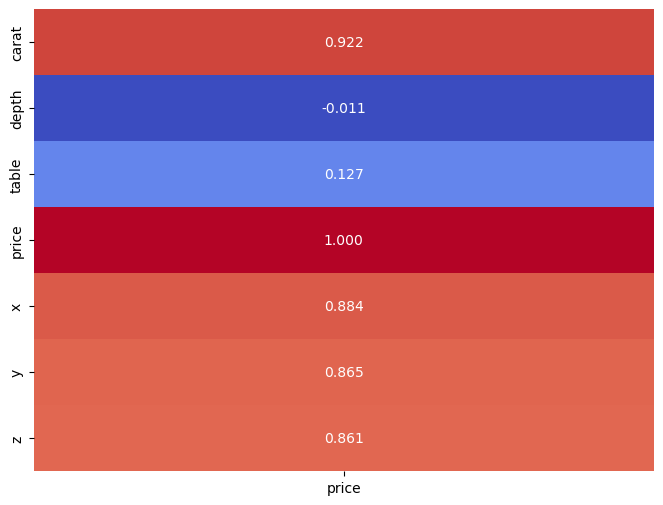

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['price']], annot=True, fmt=".3f", cmap='coolwarm', cbar=False)
plt.show()

## Procedure for Creating and Using a Regression Model
1. **Collect data**: Gather the data that will be used in the predictive model.
2. **Prepare the data**: Clean the data to remove outliers and missing values, and split it into training and testing datasets.
3. **Train the model**: Use the training data to train the regression model.
4. **Evaluate the model**: Test the model using the test data to evaluate its performance.


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [61]:
X = data[['carat']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)


In [45]:
model = LinearRegression()
print(model)


LinearRegression()


In [63]:
model.fit(X_train, y_train)


LinearRegression()

In [49]:
score = model.score(X_test, y_test)
print(score)


0.8504107786474793


In [75]:
predicted_values = model.predict(X_test)
print(predicted_values)


[9540.64191438 1940.07543252 3180.98424589 ... 9618.19871521 -464.18539337
 5507.68827094]


In [77]:
predicted_df = pd.DataFrame(predicted_values, columns=['predicted_price'])
predicted_df.head(3)


,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [55]:
result_df = X_test.copy()
result_df['y_test'] = y_test
result_df['predicted_price'] = predicted_values
result_df.head(5)


,carat,y_test,predicted_price
20244,1.52,8674,9540.641914
45013,0.54,1637,1940.075433
53351,0.70,2657,3180.984246
47212,0.59,1838,2327.859437
1460,0.86,2980,4421.893059


In [57]:
melted_df = result_df.melt(id_vars=["carat"], value_vars=["y_test", "predicted_price"], var_name="type", value_name="price")
melted_df.head()


,carat,type,price
0,1.52,y_test,8674.0
1,0.54,y_test,1637.0
2,0.70,y_test,2657.0
3,0.59,y_test,1838.0
4,0.86,y_test,2980.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


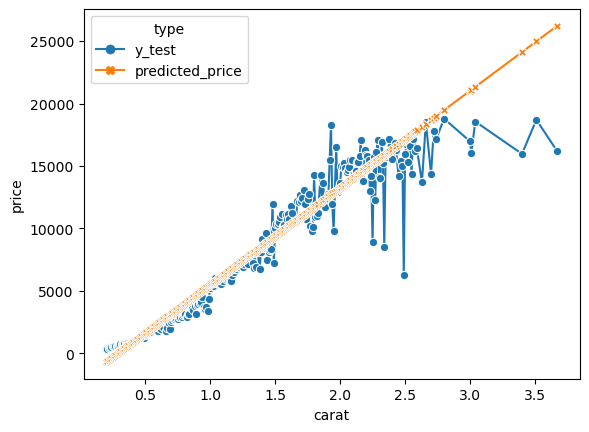

In [83]:
sns.lineplot(data=melted_df, x="carat", y="price", hue="type", style="type", markers=True, dashes=False, errorbar=None)
plt.show()

## Regression Line Equation: **y = mx + b**
- **y** is the **dependent** variable.
- **m** is the **slope** of the line.
- **x** is the **independent** variable.
- **b** is the **y-intercept**.


In [88]:
X = data.carat.values.reshape(-1,1)
y = data.price


In [90]:
lr = LinearRegression()
predicted = lr.fit(X,y)


In [92]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')


The slope is [7756.42561797] and the y-intercept is -2256.36058004672


In [94]:
print(f'Regression line equation is y = {m[0]}x + {b}')


Regression line equation is y = 7756.425617970086x + -2256.36058004672


In [96]:
carat_value = 0.70
predicted_price_070 = m[0] * carat_value + b
print(f'The predicted price for a 0.70 carat diamond is ${predicted_price_070:.2f}')


The predicted price for a 0.70 carat diamond is $3173.14


In [98]:
carat_value = 0.54
predicted_price_054 = m[0] * carat_value + b
print(f'The predicted price for a 0.54 carat diamond is ${predicted_price_054:.2f}')

The predicted price for a 0.54 carat diamond is $1932.11


## Are the estimates in the previous two cells close to the predicted prices in the results of step 18?

The estimates from the direct calculation using the regression formula are very close to those obtained from the model in step 18.
